In [91]:
import pandas as pd

df = pd.read_excel('seoul_EVstock.xlsx')

In [92]:
df.head(1)

,Unnamed: 0,운영기관,충전소,충전기 ID,타입,지역,시군구,주소,이용가능시간,제한,종류,비고,Unnamed: 12,dong
0,164.0,환경부(한국자동차환경협회),강변 공영주차장,21,DC콤보,서울특별시,성동구,서울특별시 성동구 둘레길 47-5,24시간 이용가능,NaN,급속(200kW동시),5분당 100원 저공해차량 50% 할인,[1] 행정동 명칭,성수1가1동


In [93]:
df['이용가능시간'].value_counts(10)
# 대부분이 24시간 이용가능이네요

24시간 이용가능                        0.563651
09:00~18:00                      0.165579
24시간 이용가능,입주민만 사용가능 거주자외출입제한     0.097205
24시간                             0.057953
24시간 이용가능,입주민만 사용가능 거주자 외 출입제    0.013928
                                   ...   
주중/주말 : 06~22시                   0.000097
09:00~24:00                      0.000097
06:00~12:00                      0.000097
주중 09:00~18:00 [주말 이용불가]         0.000097
10시~21시                          0.000097
Name: 이용가능시간, Length: 117, dtype: float64

In [94]:
stockdf = df.copy()

In [95]:
# 24시간 이용가능한 충전기가 몇퍼센트 차지하는지 확인해보고자합니다
# 먼저 24시간 가능한 충전기를 제외시켜보겠습니다.
# value_counts()에서 더 많은 정보를 보면 좋겠지만 그렇게 하는 방법을 찾지 못했습니다.

idx1 = df[df['이용가능시간'] == '24시간 이용가능'].index
idx2 = df[df['이용가능시간'] == '24시간'].index
idx3 = df[df['이용가능시간'] == '24시간 이용가능,입주민만 사용가능 거주자외출입제한'].index
idx4 = df[df['이용가능시간'] == '24시간 이용가능,입주민만 사용가능 거주자 외 출입제'].index
df = df.drop(idx1)
df = df.drop(idx2)
df = df.drop(idx3)
df = df.drop(idx4)
fulltime_len = len(idx1) + len(idx2) + len(idx3) + len(idx4)
print(fulltime_len)

7523


In [96]:
df['이용가능시간'].value_counts()

09:00~18:00                             1700
~                                        115
주중/주말 : 24시간                              87
주중/주말 : 06시~23시                           68
평일 09:00~18:00                            60
                                        ... 
평일 10:00-17:00/토,휴일 10:00-20:00            1
평일 06:00~22:00, 토 09:00~17:00, 일 비개방       1
10:00~22:00                                1
23시간 이용(09:00~08:00)                       1
05:00~익일01:00                              1
Name: 이용가능시간, Length: 113, dtype: int64

In [97]:
idx5 = df[df['이용가능시간'] == '~'].index
idx6 = df[df['이용가능시간'] == '주중/주말 : 24시간'].index

df = df.drop(idx5)
df = df.drop(idx6)
fulltime_len = fulltime_len + len(idx5) + len(idx6)
print(fulltime_len)

7725


In [98]:
df['이용가능시간'].value_counts(dropna = False)

09:00~18:00                         1700
NaN                                  804
주중/주말 : 06시~23시                       68
평일 09:00~18:00                        60
주중 08:00~19:00, 주말 09:00~18:00        59
                                    ... 
평일 09시~18시 이용가능, 주말/공휴일 이용불가           1
외부인 출입제한                               1
평일 08:30~18:00 / 토요일 08:30~15:30       1
주중09시~18시                              1
06:00~12:00                            1
Name: 이용가능시간, Length: 112, dtype: int64

In [99]:
df = df.fillna(0)
idx = df[df['이용가능시간'] != 0].index
nandf = df.drop(idx)
nandf['이용가능시간'].value_counts(dropna = False)
# 이용가능시간이 NaN값이 곳만 잘 추출되었네요!

0    804
Name: 이용가능시간, dtype: int64

In [100]:
nandf.head(5)

,Unnamed: 0,운영기관,충전소,충전기 ID,타입,지역,시군구,주소,이용가능시간,제한,종류,비고,Unnamed: 12,dong
21,7973.0,한국전력,e편한세상 금호파크힐스,1,DC차데모+AC3상+DC콤보,서울특별시,성동구,서울특별시 성동구 금호동1가 금호로 140,0,입주자외 출입제한 (긴급상황 이용가능),0,0,[1] 행정동 명칭,금호1가동
22,7974.0,한국전력,e편한세상 금호파크힐스,2,AC완속,서울특별시,성동구,서울특별시 성동구 금호동1가 금호로 140,0,입주자외 출입제한 (긴급상황 이용가능),0,0,[1] 행정동 명칭,금호1가동
23,7975.0,한국전력,e편한세상 금호파크힐스,3,AC완속,서울특별시,성동구,서울특별시 성동구 금호동1가 금호로 140,0,입주자외 출입제한 (긴급상황 이용가능),0,0,[1] 행정동 명칭,금호1가동
24,7976.0,한국전력,e편한세상 금호파크힐스,4,AC완속,서울특별시,성동구,서울특별시 성동구 금호동1가 금호로 140,0,입주자외 출입제한 (긴급상황 이용가능),0,0,[1] 행정동 명칭,금호1가동
43,12642.0,한국전력,성수2차대우 아파트,1,AC완속,서울특별시,성동구,서울특별시 성동구 성수동1가 상원6길 16,0,입주자외 출입제한 (긴급상황 이용가능),0,0,[1] 행정동 명칭,성수1가2동


In [101]:
#비고나 제한 열에 시간정보가 있는지 확인해봅시다.
nandf['제한'].value_counts(dropna = False)

입주자외 출입제한 (긴급상황 이용가능)     388
시설 상황에 따라 이용이 제한될 수 있음    187
0                         145
사업장 거주자외 출입제한              83
숙박 시설 이용자로 제한               1
Name: 제한, dtype: int64

In [102]:
nandf['제한'].value_counts(dropna = False)
# 비고나 제한 열에도 시간 정보가 들어있지 않네요

입주자외 출입제한 (긴급상황 이용가능)     388
시설 상황에 따라 이용이 제한될 수 있음    187
0                         145
사업장 거주자외 출입제한              83
숙박 시설 이용자로 제한               1
Name: 제한, dtype: int64

In [103]:
#NaN값들에서 일부를 조사해보았는데 전부 아파트 단지 내에 있는 충전기 였습니다.
# 아파트 단지내에 있는 충전기들을 24시간 이용가능하므로 NaN도 24시간 이용가능으로 두겠습니다.
idx7 = df[df['이용가능시간'] == 0].index
df = df.drop(idx7)
fulltime_len = fulltime_len + len(idx7) 
print(fulltime_len)

8529


In [104]:
df['이용가능시간'].value_counts()
# 24시간이 8529개로 가장 많고
# 09~18시가 1700개로 그 다음으로 많습니다. 

09:00~18:00                        1700
주중/주말 : 06시~23시                      68
평일 09:00~18:00                       60
주중 08:00~19:00, 주말 09:00~18:00       59
10:00~23:00                          56
                                   ... 
09:00~20:00                           1
평일 10:00-17:00/토,휴일 10:00-20:00       1
06:00~12:00                           1
평일09시~18시                             1
주중/주말 : 09시~18시                       1
Name: 이용가능시간, Length: 111, dtype: int64

In [105]:
idx8 = df[df['이용가능시간'] == '09:00~18:00'].index
idx9 = df[df['이용가능시간'] == '평일 09:00~18:00'].index
idx10 = df[df['이용가능시간'] == '주중 08:00~19:00, 주말 09:00~18:00'].index

df = df.drop(idx8)
df = df.drop(idx9)
df = df.drop(idx10)

h = len(idx8) + len(idx9) + len(idx10)

In [106]:
df['이용가능시간'].value_counts()

주중/주말 : 06시~23시       68
10:00~23:00           56
평일 09:00 ~ 18:00      39
평일 09시~18시 이용가능       36
비개방                   34
                      ..
09:30~17:30            1
비개방, 관용차 전용, 주차장협소     1
10:00~22:00            1
06:00~12:00            1
24시간(단, 22시이후근무자운영     1
Name: 이용가능시간, Length: 108, dtype: int64

In [107]:
len(stockdf)

11071

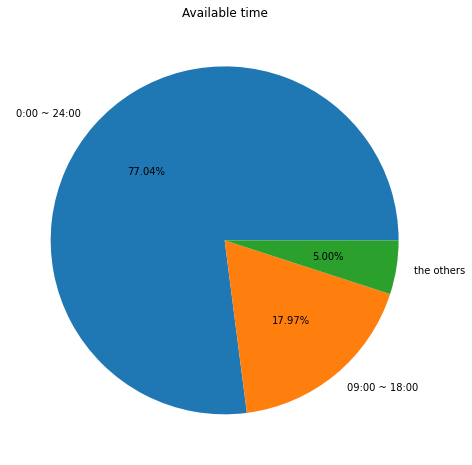

In [109]:
# 이용가능한 시간대를 원형그래프로 그려봅시다.
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 하얀색
 
ax = fig.add_subplot() ## 프래임 생성
h = h + 39 + 46
o = len(stockdf) - fulltime_len - h 

x = [fulltime_len, h, o ]
labels = ['0:00 ~ 24:00','09:00 ~ 18:00','the others'] 
ax.pie(x=x,labels=labels,autopct=lambda p : '{:.2f}%'.format(p)) ## 파이 차트 출력
plt.title('Available time')
plt.savefig('Available time.png',bbox_inches='tight', pad_inches=1)
plt.show()

In [ ]:
# 충전기를 분류할때 이용가능한 시간에 따라서도 분류하려고한다.
# 그때이 기준을 24시간 이용가능하지 않는다면 09:00~18:00시에 운영한다는 데이터로 두겠다
# 그래프는 따로 저장을 해야겠습니다.
